<a href="https://colab.research.google.com/github/Felipecuestas98/Bootcamp-Mintic/blob/main/Ejercicio_banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importa librerias de tratamiento, funciones y graficacion de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# conecta el drive e importa el dataset del ejemplo para el ejercicio
from google.colab import drive
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/Bootcamp-Analiticas y Visualizacion de Datos/Copia de dataset_banco.csv'
data = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Validacion de nombre sin transformacion
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [9]:
# renombrar las columnas a español
data_rename_2 = data.rename(columns={
                                     'age':       'edad',
                                     'job':       'empleo',
                                     'marital':   'estado civil',
                                     'education': 'escolaridad',
                                     'default':   'morosidad',
                                     'balance':   'saldo',
                                     'housing':   'vivienda',
                                     'loan':      'prestamo',
                                     'contact':   'contacto',
                                     'day':       'dia',
                                     'month':     'mes',
                                     'duration':  'duracion',
                                     'campaign':  'campaña',
                                     'pdays':     'diasprevios',
                                     'previous':  'anterior',
                                     'poutcome':  'resultado',
                                     'y':         'respuesta'})
print(data_rename_2)


       edad        empleo estado civil escolaridad morosidad   saldo vivienda  \
0        58    management      married    tertiary        no  2143.0      yes   
1        44    technician       single   secondary        no    29.0      yes   
2        33  entrepreneur      married   secondary        no     2.0      yes   
3        47   blue-collar      married     unknown        no  1506.0      yes   
4        33       unknown       single     unknown        no     1.0       no   
...     ...           ...          ...         ...       ...     ...      ...   
45210    51    technician      married    tertiary        no   825.0       no   
45211    71       retired     divorced     primary        no  1729.0       no   
45212    72       retired      married   secondary        no  5715.0       no   
45213    57   blue-collar      married   secondary        no   668.0       no   
45214    37  entrepreneur      married   secondary        no  2971.0       no   

      prestamo   contacto  

In [10]:
# Revisar variables categoricas y numericas
data_rename_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          45215 non-null  int64  
 1   empleo        45213 non-null  object 
 2   estado civil  45214 non-null  object 
 3   escolaridad   45214 non-null  object 
 4   morosidad     45215 non-null  object 
 5   saldo         45213 non-null  float64
 6   vivienda      45215 non-null  object 
 7   prestamo      45215 non-null  object 
 8   contacto      45215 non-null  object 
 9   dia           45215 non-null  int64  
 10  mes           45215 non-null  object 
 11  duracion      45214 non-null  float64
 12  campaña       45215 non-null  int64  
 13  diasprevios   45214 non-null  float64
 14  anterior      45215 non-null  int64  
 15  resultado     45215 non-null  object 
 16  respuesta     45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [11]:
# Clasificar columnas
categoricas = data_rename_2.select_dtypes(include=['object']).columns.tolist()
numericas = data_rename_2.select_dtypes(include=['int64','float64']).columns.tolist()
print('columnas categoricas:',categoricas)
print('columnas numericas', numericas)

columnas categoricas: ['empleo', 'estado civil', 'escolaridad', 'morosidad', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']
columnas numericas ['edad', 'saldo', 'dia', 'duracion', 'campaña', 'diasprevios', 'anterior']


In [12]:
# prompt: Quiero contar el numero de registros de cada subcategoria de la variable categoricas

for columna in categoricas:
  print(f"Conteo de registros para la columna '{columna}':")
  print(data_rename_2[columna].value_counts())
  print("\n")


Conteo de registros para la columna 'empleo':
empleo
blue-collar       9731
management        9455
technician        7599
admin.            5168
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64


Conteo de registros para la columna 'estado civil':
estado civil
married     27215
single      12787
divorced     5198
div.            7
Single          4
DIVORCED        3
Name: count, dtype: int64


Conteo de registros para la columna 'escolaridad':
escolaridad
secondary    23197
tertiary     13302
primary       6849
unknown       1855
SECONDARY        3
Primary          2
sec.             2
UNK              2
Secondary        1
Tertiary         1
Name: count, dtype: int64


Conteo de registros par

In [13]:
# visualiza las primeras lineas de tu .csv
# visualiza las variables categoricas y las numericas
# proporciona estadisticas descriptivas para columnas numericas
data_rename_2.describe()


,edad,saldo,dia,duracion,campaña,diasprevios,anterior
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [16]:
# LIMPIEZA DE DATOS
# Conteo de registros faltantes por columna especifica
df_faltantes = data_rename_2['empleo'].isnull().value_counts()
df_faltantes

,count
empleo,
False,45213
True,2


In [18]:
# cuenta datos nulos por columna
data_rename_2.isna().sum()

,0
edad,0
empleo,2
estado civil,1
escolaridad,1
morosidad,0
saldo,2
vivienda,0
prestamo,0
contacto,0
dia,0


In [19]:
# elimina datos filas donde hay datos faltantes
data_rename_2.dropna(inplace=True)
data_rename_2.count()

,0
edad,45207
empleo,45207
estado civil,45207
escolaridad,45207
morosidad,45207
saldo,45207
vivienda,45207
prestamo,45207
contacto,45207
dia,45207


In [21]:
data_rename_2.describe()


,edad,saldo,dia,duracion,campaña,diasprevios,anterior
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [22]:
# Contar la extension de letras en la columna educacion
data_rename_2['escolaridad'].apply(len)

,escolaridad
0,8
1,9
2,9
3,7
4,7
...,...
45210,8
45211,7
45212,9
45213,9


In [26]:
# contar los niveles de las diferentes columnas
cols_cat = categoricas
# ciclo for para contar los unicos subniveles por variable caregorica con nunique
for columna in cols_cat:
  print(f'columna {columna}: {data_rename_2[columna].nunique()} subniveles')

columna empleo: 18 subniveles
columna estado civil: 6 subniveles
columna escolaridad: 10 subniveles
columna morosidad: 2 subniveles
columna vivienda: 2 subniveles
columna prestamo: 6 subniveles
columna contacto: 5 subniveles
columna mes: 12 subniveles
columna resultado: 6 subniveles
columna respuesta: 2 subniveles


In [27]:
# calcular la desviacion estandar para las columnas numericas
desviaciones_estandar = data_rename_2[numericas].std()
# imprimir las desviaciones estandar
print(desviaciones_estandar)

edad             12.037399
saldo          3924.491665
dia               8.323015
duracion        257.460759
campaña           3.098058
diasprevios     100.103283
anterior          2.303341
dtype: float64


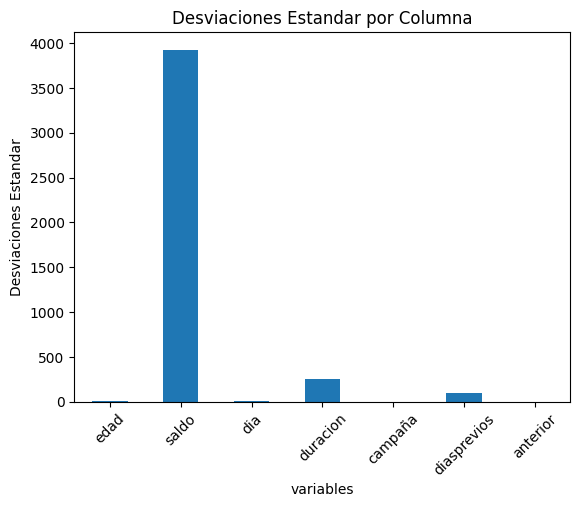

In [28]:
# crear grafica de barras para representar las desviaciones estandar
desviaciones_estandar.plot(kind='bar')
plt.title('Desviaciones Estandar por Columna')
plt.xlabel('variables')
plt.ylabel('Desviaciones Estandar')
plt.xticks(rotation=45)
plt.show()

In [29]:
# calcula la media de las columnas numericas
media = data_rename_2[numericas].mean()
# imprimir las medias
print(media)


edad             41.005596
saldo          1374.201318
dia              15.806534
duracion        258.032539
campaña           2.763731
diasprevios      40.178225
anterior          0.580198
dtype: float64


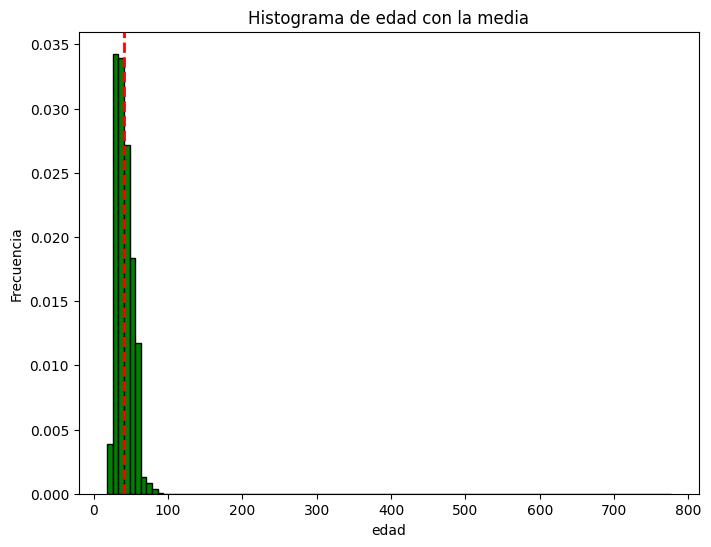

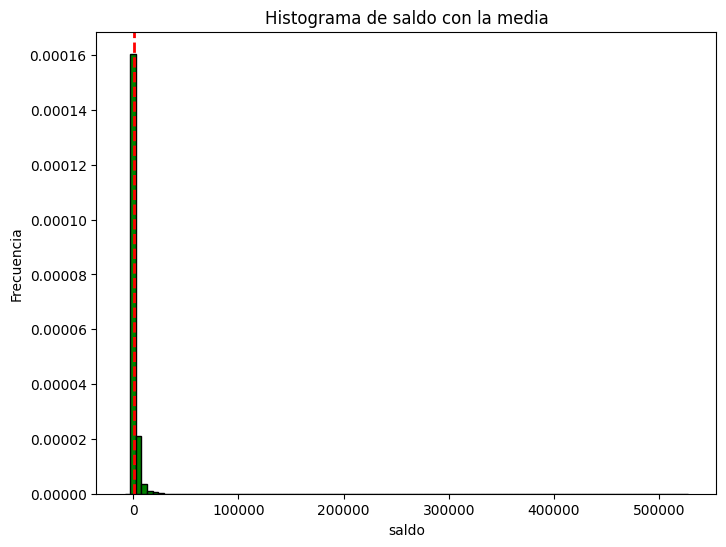

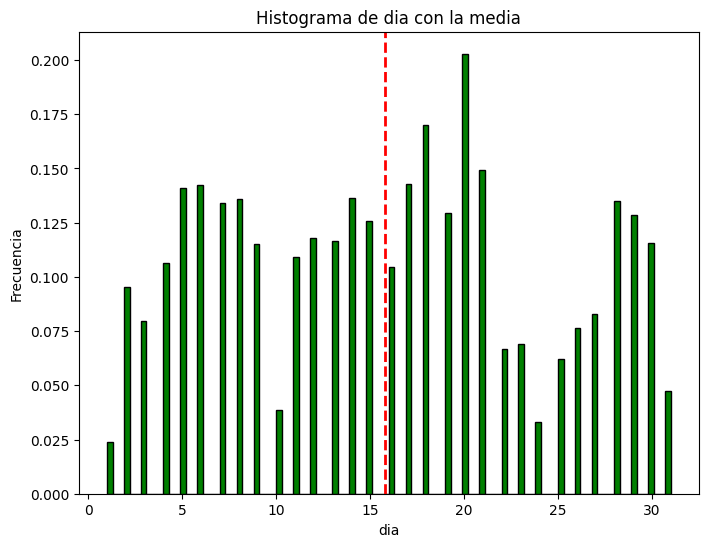

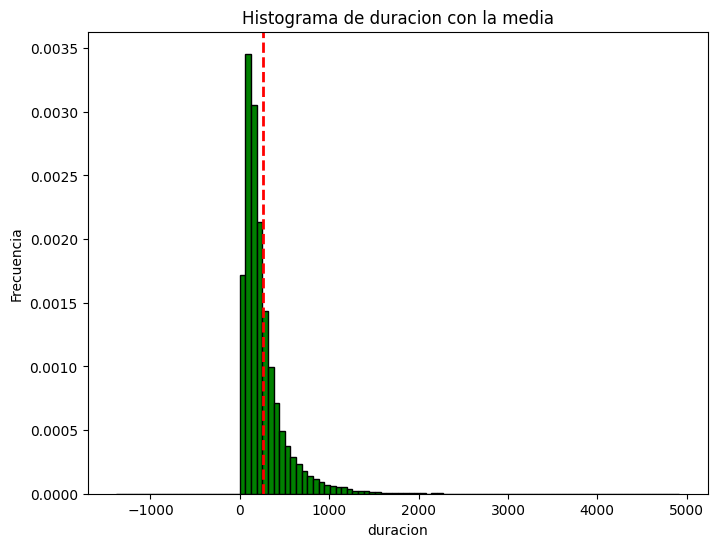

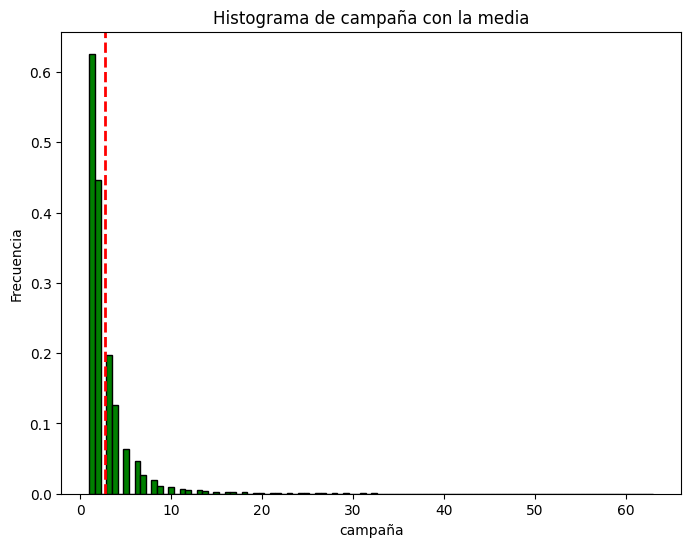

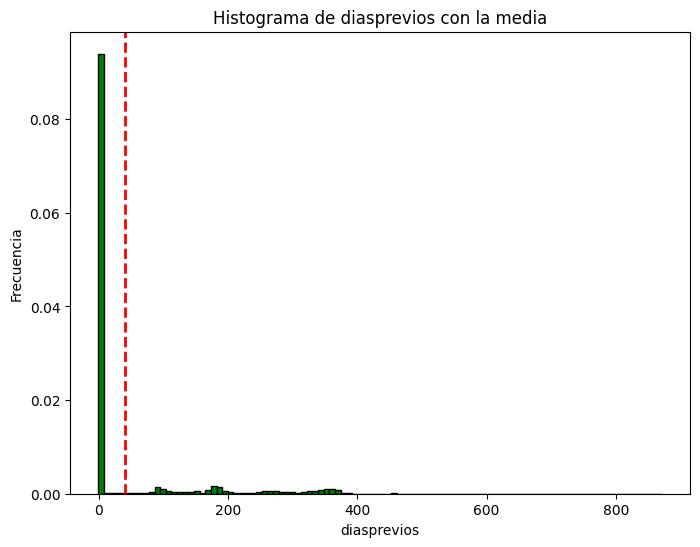

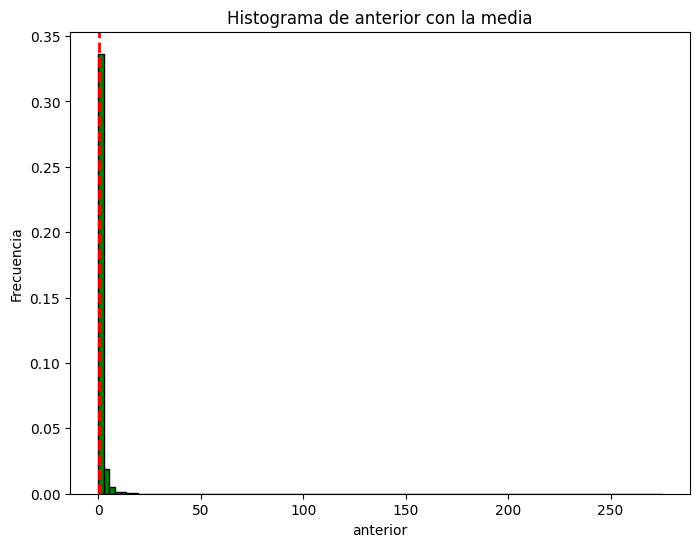

In [39]:
# prompt: Histograma para cada columna numerica, que utilice el numero de registros pero que muestre la distribucion de los datos mas no el numero de registros

for columna in numericas:
  #tanaño del histograma
  plt.figure(figsize=(8, 6))
  # histograma
  plt.hist(data_rename_2[columna], bins=100, color='Green',edgecolor='black', density=True)
  # agrega una linea vertical para mostrar la media
  plt.axvline(media[columna], color='red', linestyle='dashed', linewidth=2)
  # titulo de los histogramas
  plt.title(f'Histograma de {columna} con la media')
  plt.xlabel(columna)
  plt.ylabel('Frecuencia')
  plt.show()